In [1]:
import pandas as pd

Uploading All Datasets

In [2]:
df_question = pd.read_sas('/content/drive/MyDrive/Healthcare Prediction Task/data/raw/questionnares/DIQ_L.xpt')

In [3]:
df_question

,SEQN,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070
0,130378.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2,130380.0,1.0,35.0,NaN,NaN,2.0,NaN,NaN,1.0
3,130381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11739,142306.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11740,142307.0,1.0,42.0,NaN,NaN,2.0,NaN,NaN,1.0
11741,142308.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
11742,142309.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN


In [4]:
df_question.isnull().sum()

,0
SEQN,0
DIQ010,4
DID040,10663
DIQ160,3722
DIQ180,3440
DIQ050,10663
DID060,11401
DIQ060U,11412
DIQ070,9463


As a lot of columns have a lot of nulls , I won't use them unless for DIQ010 which will be our target 0 --> no diabetes , 1 --> diabetes

In [5]:
# Extracting target only
df_question = df_question[['SEQN', 'DIQ010']].dropna()
df_question.rename(columns={'SEQN': 'ID', 'DIQ010': 'diabetes'}, inplace=True)


In [6]:
df_question['diabetes'].value_counts()

,count
diabetes,
2.0,10371
1.0,1081
3.0,284
9.0,4


3 --> borderline , which means that doctor told patient that their blood sugar is high but they don't have diabetes , so we will treat it as non-diabetic

9 --> don't know so drop them

In [7]:
# Replacing 3 with 2 (non-diabetic)
df_question['diabetes'] = df_question['diabetes'].replace(3,2)

# dropping 9 values
df_question = df_question[df_question['diabetes'] != 9]

# Mapping values to make 0 refer to no diabetes instead of 2
df_question['diabetes'] = df_question['diabetes'].map({1:1, 2:0})

In [8]:
df_question['diabetes'].value_counts()

,count
diabetes,
0,10655
1,1081


Merging all datasets

In [9]:
# Uploading other cleaned datasets
df_demo = pd.read_csv('/content/drive/MyDrive/Healthcare Prediction Task/data/cleaned/demographics.csv')
df_lab = pd.read_csv('/content/drive/MyDrive/Healthcare Prediction Task/data/cleaned/lab_tests.csv')
df_exam = pd.read_csv('/content/drive/MyDrive/Healthcare Prediction Task/data/cleaned/exam.csv')

In [10]:
df_lab.isnull().sum()

,0
ID,0
HbA1c,484
Glucose,3527


In [11]:
df_diabetes = df_demo.merge(df_exam, on='ID', how='left') \
                      .merge(df_lab, on='ID', how='left') \
                      .merge(df_question, on='ID', how='inner')
# Using inner merge with df_question so we only keep participants with a known diabetes status.

# Inspecting full dataset

In [12]:
df_diabetes

,ID,Gender,Age,Ethnicity,Education,Marital_Status,Income_Ratio,Birth_Country,BMI,weight,height,waist,systolic_bp,diastolic_bp,HbA1c,Glucose,diabetes
0,130378.0,1.0,43.0,6.0,5.0,1.0,5.00,2.0,27.0,86.9,179.5,98.3,132.666667,96.000000,5.6,113.0,0
1,130379.0,1.0,66.0,3.0,5.0,1.0,5.00,1.0,33.5,101.8,174.2,114.7,117.000000,78.666667,5.6,99.0,0
2,130380.0,2.0,44.0,2.0,3.0,1.0,1.41,2.0,29.7,69.4,152.9,93.5,109.000000,78.333333,6.2,156.0,1
3,130384.0,1.0,43.0,1.0,2.0,3.0,0.63,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,130385.0,2.0,65.0,3.0,3.0,1.0,5.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,142305.0,2.0,76.0,1.0,1.0,2.0,2.25,2.0,26.4,60.4,151.4,89.0,143.666667,79.333333,6.0,132.0,0
7787,142307.0,2.0,49.0,4.0,5.0,3.0,2.79,1.0,NaN,NaN,143.8,NaN,130.000000,73.333333,6.2,NaN,1
7788,142308.0,1.0,50.0,2.0,4.0,1.0,1.95,2.0,26.4,79.3,173.3,98.4,108.000000,69.333333,NaN,NaN,0
7789,142309.0,1.0,40.0,2.0,4.0,2.0,3.11,1.0,25.5,81.9,179.1,96.0,126.666667,81.333333,5.2,96.0,0


In [13]:
df_diabetes.shape

(7791, 17)

In [14]:
df_diabetes.isnull().sum()

,0
ID,0
Gender,0
Age,0
Ethnicity,0
Education,0
Marital_Status,0
Income_Ratio,0
Birth_Country,0
BMI,1822
weight,1809


okay now our dataset has a lot of null values , I will handle each group of columns by imputing them with the median so not lose so much data while keeping it as accurate and meaningful for ML as possible.

Median imputation avoids introducing extreme outliers to the dataset , and keeping it's size and avoids overfitting , it though reduces variance but median imputation is an accepted method in real-world ML pipelines when missingness is high

## First: Handling nulls for BMI, weight, height, waist columns:

I will impute them according to gender , as body features differ according to gender.  

In [15]:
# Imputing missing values (BMI, weight, height, waist) using median per Gender

for col in ['BMI', 'weight', 'height', 'waist']:
    df_diabetes[col] = df_diabetes.groupby('Gender')[col].transform(
        lambda x: x.fillna(x.median())
    )


In [16]:
df_diabetes[['BMI', 'weight', 'height', 'waist']].isnull().sum()

,0
BMI,0
weight,0
height,0
waist,0


## Second: Handling nulls for systolic_bp, diastolic_bp columns:

I will group them by both gender & age group , as blood pressure strongly depends on both age and gender — men and women tend to have different average blood pressures, especially as age increases.

In [17]:
# Creating Age Groups for more accurate imputation
df_diabetes['Age_Group'] = pd.cut(df_diabetes['Age'],
                                  bins=[20, 30, 40, 50, 60, 70, 80],
                                  labels=['20s', '30s', '40s', '50s', '60s', '70s'])

# Imputing missing blood pressure values using median per Gender + Age_Group
for col in ['systolic_bp', 'diastolic_bp']:
    df_diabetes[col] = df_diabetes.groupby(['Gender', 'Age_Group'])[col].transform(
        lambda x: x.fillna(x.median())
    )

/tmp/ipython-input-2788344085.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diabetes[col] = df_diabetes.groupby(['Gender', 'Age_Group'])[col].transform(


In [18]:
df_diabetes[['systolic_bp', 'diastolic_bp']].isnull().sum()

,0
systolic_bp,71
diastolic_bp,71


There are still null values because some gender–age groups didn’t have any blood pressure data, the median couldn’t be calculated for them, so those 71 values stayed missing.


In [19]:
# Dropping remaining null values

df_diabetes = df_diabetes.dropna(subset=['systolic_bp', 'diastolic_bp'])

In [20]:
df_diabetes[['systolic_bp', 'diastolic_bp']].isnull().sum()

,0
systolic_bp,0
diastolic_bp,0


## Third : Handling nulls for HBA1c & Glucose columns

I will impute them using median imputation , Won't remove their nulls as they are important features

In [21]:
# First, imputing using median within Gender + Age_Group
df_diabetes['Glucose'] = df_diabetes.groupby(['Gender','Age_Group'])['Glucose'].transform(
    lambda x: x.fillna(x.median())
)
df_diabetes['HbA1c'] = df_diabetes.groupby(['Gender','Age_Group'])['HbA1c'].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipython-input-948482428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diabetes['Glucose'] = df_diabetes.groupby(['Gender','Age_Group'])['Glucose'].transform(
/tmp/ipython-input-948482428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['Glucose'] = df_diabetes.groupby(['Gender','Age_Group'])['Glucose'].transform(
/tmp/ipython-input-948482428.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

In [22]:
df_diabetes[['Glucose','HbA1c']].isnull().sum()

,0
Glucose,0
HbA1c,0


In [23]:
df_diabetes.isnull().sum()

,0
ID,0
Gender,0
Age,0
Ethnicity,0
Education,0
Marital_Status,0
Income_Ratio,0
Birth_Country,0
BMI,0
weight,0


### 🎉 Now our full dataset doesn't have any null values and is cleaned , we can proceed to EDA.

# Exploratory Data Analysis (EDA)

In [24]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7720 entries, 0 to 7790
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              7720 non-null   float64 
 1   Gender          7720 non-null   float64 
 2   Age             7720 non-null   float64 
 3   Ethnicity       7720 non-null   float64 
 4   Education       7720 non-null   float64 
 5   Marital_Status  7720 non-null   float64 
 6   Income_Ratio    7720 non-null   float64 
 7   Birth_Country   7720 non-null   float64 
 8   BMI             7720 non-null   float64 
 9   weight          7720 non-null   float64 
 10  height          7720 non-null   float64 
 11  waist           7720 non-null   float64 
 12  systolic_bp     7720 non-null   float64 
 13  diastolic_bp    7720 non-null   float64 
 14  HbA1c           7720 non-null   float64 
 15  Glucose         7720 non-null   float64 
 16  diabetes        7720 non-null   int64   
 17  Age_Group       772

Knowing our data types is important for determining of how we will use encoding before the ML model.

In [25]:
# Printing the dataset's statistics for continuous columns
df_diabetes[['Age', 'BMI','weight','height','waist','systolic_bp', 'diastolic_bp', 'HbA1c','Glucose']].describe()

,Age,BMI,weight,height,waist,systolic_bp,diastolic_bp,HbA1c,Glucose
count,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000
mean,53.948964,29.523925,82.408481,166.858873,100.670712,122.501274,74.467530,5.722034,104.926166
std,17.303259,6.471022,19.883137,9.439279,14.581885,16.204639,9.660078,0.973238,22.752565
min,21.000000,11.100000,27.900000,133.000000,60.000000,70.000000,37.333333,3.200000,59.000000
25%,39.000000,25.800000,71.400000,160.700000,92.700000,111.333333,69.000000,5.300000,97.000000
50%,57.000000,28.700000,78.800000,165.900000,98.700000,120.333333,74.333333,5.600000,102.000000
75%,68.000000,31.700000,89.900000,174.700000,107.000000,130.666667,78.666667,5.800000,107.000000
max,80.000000,74.800000,248.200000,200.700000,187.000000,232.333333,139.000000,17.100000,561.000000


It helps us know the disribution of the data , we see that most participants are middle-aged adults (median age 57) with average BMI around 29.5 , which indicates that the participants most of them are overweight people.

### A histogram of age distribution according to diabetes status

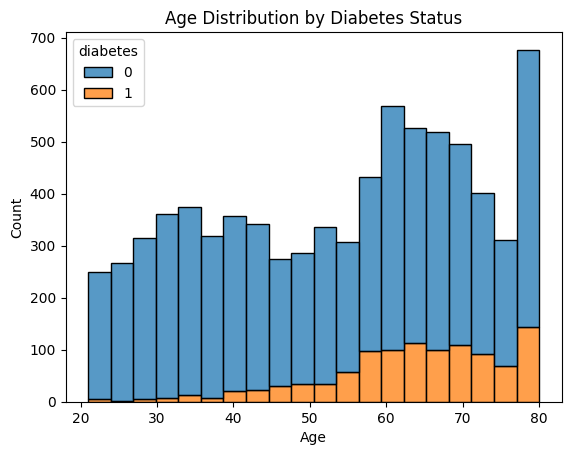

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_diabetes, x='Age', hue='diabetes', bins=20, multiple='stack')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The histogram clearly shows that age is a very important predictor for diabetes as it increases the risk of diabetes increase especially in 40+ ages , but there is a severe class imbalance so this means that I must prioritize metrics like Precision , Recall , F1-score and AUC-ROC curve over accuracy to build a reliable model.

### Boxplot for BMI vs Diabetes

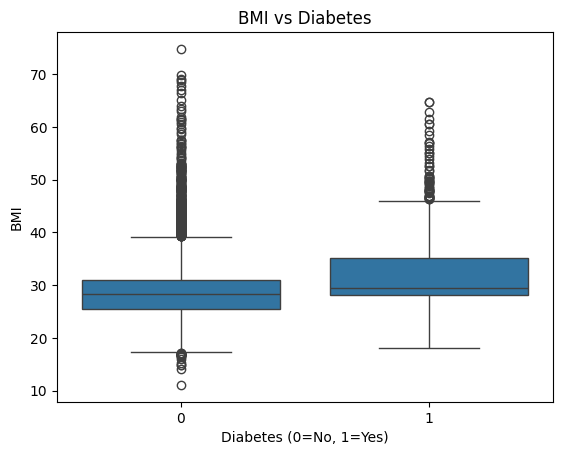

In [27]:
sns.boxplot(x='diabetes', y='BMI', data=df_diabetes)
plt.title('BMI vs Diabetes')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()


Here the box plot shows that the median BMI for the diabetic group is visibly higher than the non-diabetic group , also the boxplot confirms that higher BMI strongly predicts diabetes, meaning it will be a key feature for the model, especially in identifying high-risk patients.

### Barplot for Diabetes vs Glucose

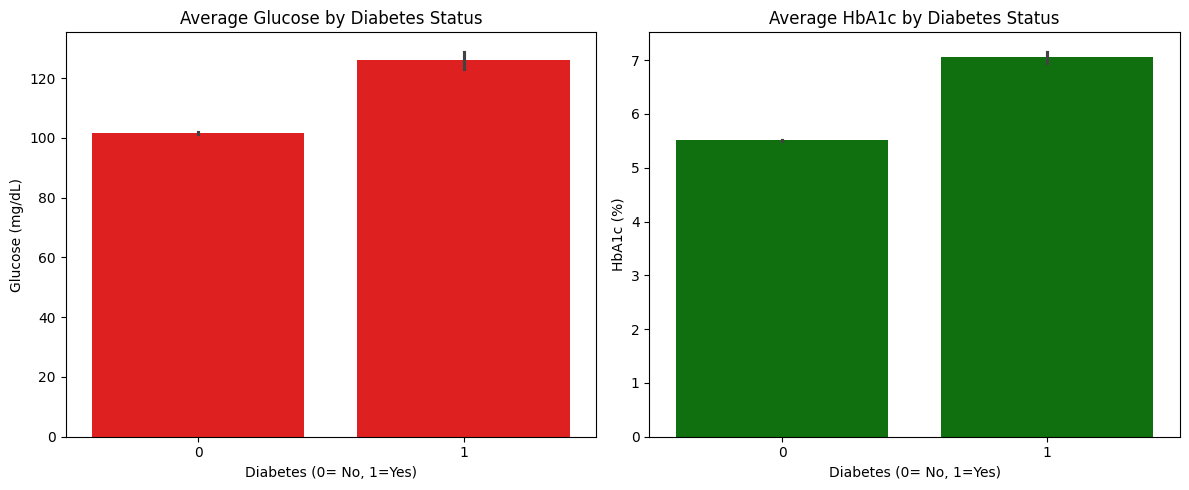

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='diabetes', y='Glucose', data=df_diabetes, color='r', ax=axes[0])
axes[0].set_title('Average Glucose by Diabetes Status')
axes[0].set_xlabel('Diabetes (0= No, 1=Yes)')
axes[0].set_ylabel('Glucose (mg/dL)')

sns.barplot(x='diabetes', y='HbA1c', data=df_diabetes, color='g', ax=axes[1])
axes[1].set_title('Average HbA1c by Diabetes Status')
axes[1].set_xlabel('Diabetes (0= No, 1=Yes)')
axes[1].set_ylabel('HbA1c (%)')

plt.tight_layout()
plt.show()

Here we can see that diabetes patients have higher average glucose values than the non-diabetic people ,making it also a strong predictor for our model.

## Correlation Heatmap

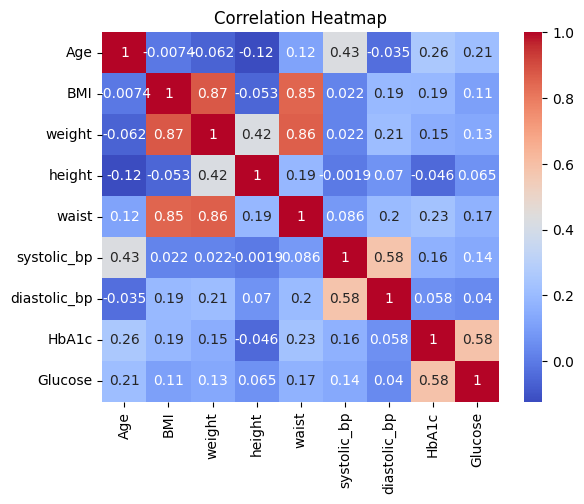

In [29]:
corr = df_diabetes[['Age','BMI','weight','height','waist','systolic_bp','diastolic_bp','HbA1c','Glucose']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


It shows that BMI , waist , weight , are highly correlated

/tmp/ipython-input-4211412284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_lab_avg = df_diabetes.groupby('Age_Group')[['BMI','Glucose','HbA1c']].mean()


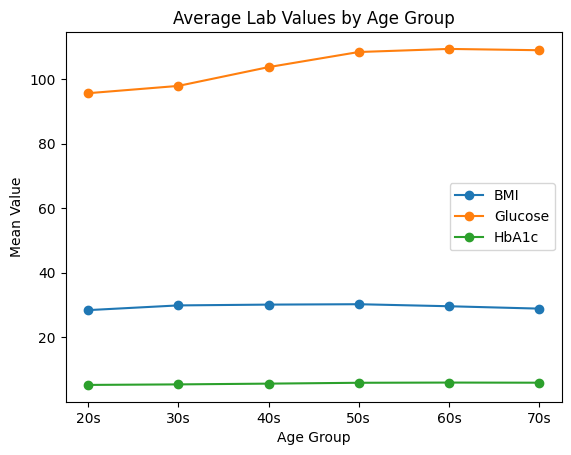

In [30]:
age_lab_avg = df_diabetes.groupby('Age_Group')[['BMI','Glucose','HbA1c']].mean()
age_lab_avg.plot(marker='o')
plt.title('Average Lab Values by Age Group')
plt.ylabel('Mean Value')
plt.xlabel('Age Group')
plt.show()


### Encoding & Scaling variables

In [31]:
from sklearn.preprocessing import StandardScaler


# 1️. Define columns
numeric_cols = ['Age', 'BMI', 'weight', 'height', 'waist',
                'systolic_bp', 'diastolic_bp', 'Glucose', 'HbA1c']

categorical_cols = ['Gender', 'Ethnicity', 'Education',
                    'Marital_Status', 'Birth_Country']

target_col = 'diabetes'


# 2. Encode Categorical Variables (one-hot encoding)
df_encoded = pd.get_dummies(df_diabetes, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.drop(columns=['Age_Group'])

# 3. Scale numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


# 4. Save the cleaned dataset
df_encoded.to_csv('/content/drive/MyDrive/Healthcare Prediction Task/data/cleaned/diabetes_clean.csv', index=False)

print("✅ Cleaned dataset saved! Shape:", df_encoded.shape)

✅ Cleaned dataset saved! Shape: (7720, 28)


# ML Modeling

ML model to use (ordered):

o	Logistic Regression

o	Random Forest

o	XGBoost


In [32]:
# Loading the cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/Healthcare Prediction Task/data/cleaned/diabetes_clean.csv')

# Separating features and target
X = df.drop(columns=['diabetes', 'ID'])  # All columns except the target
y = df['diabetes']                 # Target column

# Quick check
print(X.shape, y.shape)
print(y.value_counts())


(7720, 26) (7720,)
diabetes
0    6653
1    1067
Name: count, dtype: int64


Train-Test split

In [33]:
from sklearn.model_selection import train_test_split

# Split into train and test (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # ensures the same class distribution in both train and test sets (important for imbalanced data).
)

# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())


(6176, 26) (1544, 26)
diabetes
0    5322
1     854
Name: count, dtype: int64 diabetes
0    1331
1     213
Name: count, dtype: int64


## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , roc_auc_score

# Define the model with class weights
lr_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Fit the model
lr_clf.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr_clf.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr_y_pred):.2f}")

Confusion Matrix:
 [[1135  196]
 [  53  160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1331
           1       0.45      0.75      0.56       213

    accuracy                           0.84      1544
   macro avg       0.70      0.80      0.73      1544
weighted avg       0.89      0.84      0.85      1544

ROC-AUC: 0.80


In case of imbalanced classes , our metric will be the F1-score

Logistic Regression shows good overall accuracy (0.84) and a decent ability to distinguish between diabetic and non-diabetic participants (ROC-AUC = 0.80). The model has lower precision for predicting diabetes (0.45), meaning some false positives, but higher recall (0.75), so most diabetic cases are correctly identified. This indicates the model captures diabetic cases reasonably well, though there is room for improvement.


## Random Forest Classifer

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

#  Make predictions
rf_y_pred = rf_clf.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_y_pred):.2f}")

Confusion Matrix:
 [[1303   28]
 [ 110  103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1331
           1       0.79      0.48      0.60       213

    accuracy                           0.91      1544
   macro avg       0.85      0.73      0.77      1544
weighted avg       0.90      0.91      0.90      1544

ROC-AUC: 0.73


Using class_weight='balanced' adjusts the model to give more importance to the minority class (diabetes=1), helping to reduce bias toward the majority class and improve prediction for underrepresented cases.

The Random Forest model is biased toward the majority class (non-diabetic), which is expected due to class imbalance , achieving good overall performance (accuracy 0.91) with low recall (0.48) for the diabetic class.

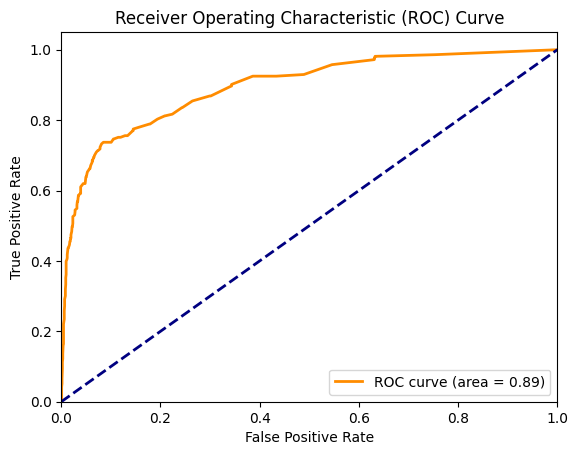

In [36]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
rf_y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

In [37]:
from xgboost import XGBClassifier


# Define XGBoost with class weights equivalent
xgb_clf = XGBClassifier(scale_pos_weight=(len(y_train[y_train==0])/len(y_train[y_train==1])),
                        random_state=42,
                        eval_metric='logloss')

# Fit the model
xgb_clf.fit(X_train, y_train)

#  Make predictions
xgb_y_pred = xgb_clf.predict(X_test)
xgb_y_prob = xgb_clf.predict_proba(X_test)[:,1]  # For ROC-AUC

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_y_prob):.2f}")



Confusion Matrix:
 [[1246   85]
 [  80  133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1331
           1       0.61      0.62      0.62       213

    accuracy                           0.89      1544
   macro avg       0.77      0.78      0.78      1544
weighted avg       0.89      0.89      0.89      1544

ROC-AUC: 0.89


Okay for now XGBoost is the model that has balanced recall (0.62) and precision (0.61) & Highest F1-score → overall best trade-off and highest ROC-AUC.

## Threshold Tuning

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# 1. Get predicted probabilities for class 1
y_probs = xgb_clf.predict_proba(X_test)[:, 1]

# 2. Set a new threshold (default is 0.5)
threshold = 0.4  # The most balanced threshold after trial of many others

# 3. Convert probabilities to predictions using the threshold
y_pred_thresh = (y_probs >= threshold).astype(int)

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_probs):.2f}")

Confusion Matrix:
 [[1214  117]
 [  71  142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1331
           1       0.55      0.67      0.60       213

    accuracy                           0.88      1544
   macro avg       0.75      0.79      0.76      1544
weighted avg       0.89      0.88      0.88      1544


ROC-AUC: 0.89


## Hyperparameter Tuning

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the model
xgb_clf = XGBClassifier(objective='binary:logistic',
                        eval_metric='logloss',
                        use_label_encoder=False,
                        random_state=42,
                        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))  # handle imbalance

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Setup RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,            # number of parameter settings sampled
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#  Fit on training data
rand_search.fit(X_train, y_train)

#  Best parameters
print("Best Parameters:", rand_search.best_params_)

#  Evaluate on test data
best_xgb = rand_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
Confusion Matrix:
 [[1157  174]
 [  44  169]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1331
           1       0.49      0.79      0.61       213

    accuracy                           0.86      1544
   macro avg       0.73      0.83      0.76      1544
weighted avg       0.90      0.86      0.87      1544


ROC-AUC: 0.91


Okay now , **ROC-AUC tuned XGBoost model performance is quite good** As:

* **ROC-AUC = 0.91** → Excellent ability to discriminate between diabetic and non-diabetic cases.
* **Recall for diabetics = 0.79** → You are catching **79% of actual diabetics**, which is strong for an imbalanced healthcare dataset.
* **F1-score for diabetics = 0.61** → Reasonable balance between precision and recall for the minority class.
* **Accuracy = 0.86** → Not the main priority here because our dataset is imbalanced, but still decent.

✅ **Conclusion:** For **medical predictions where missing diabetics is risky**, this model is performing well.

### Feature Importance

               feature  importance
8                HbA1c    0.306585
9              Glucose    0.084542
0                  Age    0.053172
19       Education_5.0    0.053041
12       Ethnicity_3.0    0.052239
5                waist    0.043709
2                  BMI    0.037360
13       Ethnicity_4.0    0.033787
7         diastolic_bp    0.031748
21  Marital_Status_2.0    0.030839
6          systolic_bp    0.028843
15       Ethnicity_7.0    0.027811
3               weight    0.027492
1         Income_Ratio    0.024927
22  Marital_Status_3.0    0.022903
4               height    0.022534
10          Gender_2.0    0.020667
16       Education_2.0    0.020122
18       Education_4.0    0.019969
11       Ethnicity_2.0    0.016464


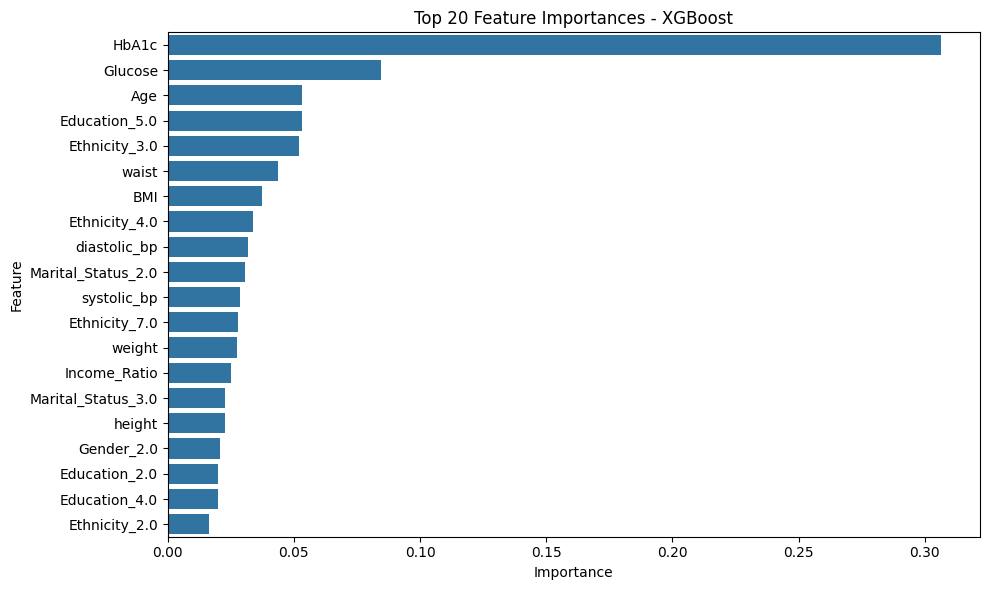

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_xgb.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display top 20 features
print(feature_importances.head(20))

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title("Top 20 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


This figure shows that HbA1c is the strongest predictor of diabetes because it directly reflects long-term blood sugar levels, followed by fasting glucose levels. This aligns with clinical knowledge, as both lab tests are key indicators of blood sugar regulation and diabetes risk. so the model is picking up the correct signals.

### Saving the best XGBoost Model

In [41]:
import joblib

# Save the model
joblib.dump(best_xgb, "diabetes_xgb_model.pkl")
print("Model saved successfully as diabetes_xgb_model.pkl")
# Save the scaler too (if you scaled numeric inputs)
joblib.dump(scaler, "scaler.pkl")


Model saved successfully as diabetes_xgb_model.pkl


['scaler.pkl']

Now we have a model that predicts if someone have high risk of diabetes or not, this model can extended to be used in hospital flow to recieve real-time data
from IoT-enabled wearable devices. For this case study, I just simulated  real-time patients data by generating random data that gets fed to the model.
This helps the hospital know how many patients probably will have this disease , and by so , they plan what resources to allocate.

## Model Deployment using **Streamlit**

In [42]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.2 MB/s eta 0:00:00


In [43]:
# Step 1: Save this as app.py in Colab
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib
import random
import math

# Load Model & Scaler
model = joblib.load('/content/diabetes_xgb_model.pkl')
scaler = joblib.load('/content/scaler.pkl')

# Dictionaries for categorical variables
gender_dict = {1: "Male", 2: "Female"}
ethnicity_dict = {1: "Mexican American",2: "Other Hispanic",3: "Non-Hispanic White",
                  4: "Non-Hispanic Black",6: "Non-Hispanic Asian",7: "Other Race - Including Multi-Racial"}
education_dict = {1: "Less than 9th grade",2: "9-11th grade",3: "High school/GED",
                  4: "Some college",5: "College graduate or above"}
marital_dict = {1: "Married",2: "Widowed",3: "Divorced",
                4: "Separated",5: "Never married",6: "Living with partner"}
birth_country_dict = {1: "USA",2: "Other country"}

# Streamlit App
st.title("Diabetes Risk Prediction Dashboard")
st.write("Enter your details to estimate the probability of diabetes.")

# User inputs:

# Categorical Inputs
gender = st.selectbox("Select Gender", options=[None]+list(gender_dict.keys()),
                      format_func=lambda x: "Select..." if x is None else gender_dict[x])
ethnicity = st.selectbox("Select Ethnicity", options=[None]+list(ethnicity_dict.keys()),
                         format_func=lambda x: "Select..." if x is None else ethnicity_dict[x])
education = st.selectbox("Select Education Level", options=[None]+list(education_dict.keys()),
                         format_func=lambda x: "Select..." if x is None else education_dict[x])
marital_status = st.selectbox("Select Marital Status", options=[None]+list(marital_dict.keys()),
                              format_func=lambda x: "Select..." if x is None else marital_dict[x])
birth_country = st.selectbox("Select Birth Country", options=[None]+list(birth_country_dict.keys()),
                             format_func=lambda x: "Select..." if x is None else birth_country_dict[x])

# Numerical Inputs
age = st.number_input("Age", min_value=20, max_value=80)
bmi = st.number_input("BMI", min_value=0.0)
weight = st.number_input("Weight (kg)", min_value=0.0)
height = st.number_input("Height (cm)", min_value=0.0)
waist = st.number_input("Waist (cm)", min_value=0.0)
systolic_bp = st.number_input("Systolic BP", min_value=0)
diastolic_bp = st.number_input("Diastolic BP", min_value=0)
glucose = st.number_input("Glucose", min_value=0.0)
hba1c = st.number_input("HbA1c", min_value=0.0)


# Manual Prediction Button

if st.button("Predict Diabetes Risk"):
    input_data = pd.DataFrame({
        'Age': [age], 'BMI': [bmi], 'weight': [weight], 'height': [height],
        'waist': [waist], 'systolic_bp': [systolic_bp], 'diastolic_bp': [diastolic_bp],
        'Glucose': [glucose], 'HbA1c': [hba1c], 'Gender': [gender],
        'Ethnicity': [ethnicity], 'Education': [education],
        'Marital_Status': [marital_status], 'Birth_Country': [birth_country]
    })

    # Encode categorical
    categorical_cols = ['Gender','Ethnicity','Education','Marital_Status','Birth_Country']
    input_encoded = pd.get_dummies(input_data, columns=categorical_cols, drop_first=True)

    # Align with training
    for col in model.feature_names_in_:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[model.feature_names_in_]

    # Scale numeric
    numeric_cols = ['Age', 'BMI', 'weight', 'height', 'waist',
                    'systolic_bp', 'diastolic_bp', 'Glucose', 'HbA1c']
    input_encoded[numeric_cols] = scaler.transform(input_encoded[numeric_cols])

    # Predict
    pred_proba = model.predict_proba(input_encoded)[:,1]
    st.subheader("Prediction Result")
    st.write(f"Estimated probability of diabetes: {pred_proba[0]*100:.2f}%")
    if pred_proba[0] >= 0.4:
        st.warning("High risk of diabetes ⚠️")
    else:
        st.success("Low risk of diabetes ✅")


# Live Real-Time Patient Monitoring Simulation

# "Generate New Patient" button that simulates a new patient arriving
def generate_live_patient():
    return pd.DataFrame([{
        'Age': random.randint(20, 80),
        'BMI': round(random.uniform(18, 45),1),
        'weight': round(random.uniform(50, 120),1),
        'height': round(random.uniform(150, 200),1),
        'waist': round(random.uniform(70, 120),1),
        'systolic_bp': random.randint(90, 180),
        'diastolic_bp': random.randint(60, 120),
        'Glucose': round(random.uniform(70, 180),1),
        'HbA1c': round(random.uniform(4.5, 12.0),1),
        'Gender': random.choice([1,2]),
        'Ethnicity': random.choice(list(ethnicity_dict.keys())),
        'Education': random.choice(list(education_dict.keys())),
        'Marital_Status': random.choice(list(marital_dict.keys())),
        'Birth_Country': random.choice(list(birth_country_dict.keys()))
    }])


st.subheader("Simulated Live Patient Data")
if st.button("Generate Live Patient"):
    # Generate random patient
    live_patient = generate_live_patient()

    # Display all patient details
    st.write("### Patient Details Entered / Generated")
    st.dataframe(live_patient)  # This prints all features in a table

    # One-hot encode categorical columns
    categorical_cols = ['Gender','Ethnicity','Education','Marital_Status','Birth_Country']
    live_encoded = pd.get_dummies(live_patient, columns=categorical_cols, drop_first=True)

    # Align with training columns
    for col in model.feature_names_in_:
        if col not in live_encoded.columns:
            live_encoded[col] = 0
    live_encoded = live_encoded[model.feature_names_in_]

    # Scale numeric columns
    numeric_cols = ['Age', 'BMI', 'weight', 'height', 'waist',
                    'systolic_bp', 'diastolic_bp', 'Glucose', 'HbA1c']
    live_encoded[numeric_cols] = scaler.transform(live_encoded[numeric_cols])

    # Make prediction
    live_pred = model.predict_proba(live_encoded)[:,1][0]

    st.subheader("Live Prediction")
    st.write(f"Estimated probability of diabetes: {live_pred*100:.2f}%")
    if live_pred >= 0.4:
        st.warning("High risk of diabetes ⚠️")
    else:
        st.success("Low risk of diabetes ✅")


    # Resource Optimization
    # Initialize session state counter for high-risk patients
    if 'high_risk_count' not in st.session_state:
        st.session_state.high_risk_count = 0

    # Update high-risk count
    if live_pred >= 0.4:
        st.session_state.high_risk_count += 1


    # Simple hospital resource rules
    high_risk = st.session_state.high_risk_count
    doctors_needed = math.ceil(high_risk / 10)  # +1 doctor per 10 high-risk patients
    test_kits_needed = high_risk * 2            # 2 test kits per high-risk patient

    st.subheader("Resource Recommendations")
    st.write(f"High-risk patients today: {high_risk}")
    st.write(f"Doctors needed: {doctors_needed}")
    st.write(f"Test kits needed: {test_kits_needed}")

Writing app.py


In [44]:
!pip install streamlit pyngrok


In [45]:
from pyngrok import ngrok

# token
ngrok.set_auth_token("359M56QEIBGemGOHj479atqKut0_5UK4UFjm5mU7vd13sLEYT")

# run Streamlit
get_ipython().system_raw("streamlit run app.py --server.port 8501 --server.headless true &")

public_url = ngrok.connect(8501).public_url
print("🚀 Streamlit app is live at:", public_url)

🚀 Streamlit app is live at: https://onita-postdiagnostic-nondogmatically.ngrok-free.dev
